### Final Santiago Carrillo
### PUI Fall 2016 

Throughout all the steps below, my intention was to perform most of the data wrangling myself. For the first portion of the tasks, I utilized American Community Survey data provided by the Census Bureau's America Fact FInder. This was only possible for gathering and analyzing 2010 demographic. All of the 2000 data was obtained by utilizing Professor Bianco's clean amd processed data. For this reason, I took extra time in the first 5 tasks and some of the plots must be refined. 


In [67]:
import pandas as pd
import json
import os
import pylab as pl
import geopandas as gp
import zipfile
import urllib
import urllib2
from sklearn.cluster import KMeans
from matplotlib import cm
from descartes import PolygonPatch
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from pandas.io.common import ZipFile
import pylab as pl
import zipfile
from geopandas import GeoDataFrame
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2
import scipy.stats
from cStringIO import StringIO
import seaborn
import ast
from scipy.spatial.distance import pdist, squareform
from cStringIO import StringIO


%pylab inline


%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [68]:
!wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip
!wget ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip

--2016-12-20 08:33:44--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip
           => “zbp00totals.zip.4”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp00totals.zip ... 628434
==> PASV ... done.    ==> RETR zbp00totals.zip ... done.
Length: 628434 (614K) (unauthoritative)

100%[======================================>] 628,434     --.-K/s   in 1.0s    

2016-12-20 08:33:46 (587 KB/s) - “zbp00totals.zip.4” saved [628434]

--2016-12-20 08:33:46--  ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip
           => “zbp10totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ...

## PUI Fall 2016 Final-jc7344
1) Find the number of businesses in 2010 and 2000. This information is available at the zipcode level (HW11).

In [69]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [70]:
#After having problems due to multiple downloads of the same census data, I manually placed the .txt file on PUIDATA
os.path.isfile(os.getenv('PUIDATA') + '/' + 'zbp00totals.txt')

True

In [71]:
business2000 = pd.read_csv(os.getenv('PUIDATA') + '/' + 'zbp00totals.txt')

In [72]:
business2000.head()

ZIP            NAME EMPFLAG   EMP    QP1      AP  EST
0   501  HOLTSVILLE, NY       A     0      0       0    1
1  1001      AGAWAM, MA     NaN  8042  59833  259661  493
2  1002     AMHERST, MA     NaN  6547  36719  169658  563
3  1003     AMHERST, MA     NaN    82    308    2482   13
4  1004     AMHERST, MA     NaN   717   2049    5826   48

In [73]:
os.system("mv zbp10totals.zip " + os.getenv("PUIDATA"))

0

In [74]:
os.path.isfile(os.getenv('PUIDATA') + '/' + 'zbp10totals.zip')

True

In [75]:
business2010 = pd.read_csv(os.getenv('PUIDATA') + '/' + 'zbp10totals.txt')

In [76]:
business2010.head()

zip            name empflag emp_nf    emp qp1_nf    qp1 ap_nf      ap  \
0   501  HOLTSVILLE, NY       A      D      0      D      0     D       0   
1  1001      AGAWAM, MA     NaN      G   9185      G  70693     G  314508   
2  1002     AMHERST, MA     NaN      G  15633      G  82069     G  351589   
3  1003     AMHERST, MA     NaN      G    168      H   1297     H    5761   
4  1004     AMHERST, MA     NaN      H    189      H   1710     H    7241   

   est        city stabbr   cty_name  
0    2  HOLTSVILLE     NY    SUFFOLK  
1  448      AGAWAM     MA    HAMPDEN  
2  570     AMHERST     MA  HAMPSHIRE  
3   16     AMHERST     MA  HAMPSHIRE  
4   21     AMHERST     MA  HAMPSHIRE

In [77]:
business2000 = business2000[['ZIP', 'EST']]

In [78]:
business2000.head()

ZIP  EST
0   501    1
1  1001  493
2  1002  563
3  1003   13
4  1004   48

In [79]:
# In order to prepare for a future merge, all column names most be similar
business2000.rename(columns = {"ZIP": "zip", "EST": "est"}, inplace = True)
business2000 = business2000[['zip', 'est']]
business2000.head()

zip  est
0   501    1
1  1001  493
2  1002  563
3  1003   13
4  1004   48

In [80]:
#from math&pencil at http://blog.mathandpencil.com/column-and-row-sums/ I reviewed a basic way to sum rows/columns, in this case 'est' corresponds to the number of establishments.
business2000.sum(axis = 0)

zip    1972779752
est       7070048
dtype: int64

In [81]:
business2010 = business2010[['zip','est']]

In [82]:
business2010.head()

zip  est
0   501    2
1  1001  448
2  1002  570
3  1003   16
4  1004   21

In [83]:
business2010.sum(axis = 0)

zip    1945123164
est       7396628
dtype: int64

1. According to the census data, while in 2000 there were 7,070,048 establishments, in 2010 the city reported 7,396,628. As it is possible to see, the unit of analysis for both cases is zipcode. 

2) Gather a zipcode shapefile and merge the number of businesses with the zipcode shapfile

3) Find the density of businesses by dividing the number of businesses by the area of the zipcode (see the hints file if you need to) and show them the density in a choroplath (a heatmap version of a geographical map where each zipcode (census tract later) is a different color based on the value of the feature you are mapping) for 2000 and 2010 (OPTIONALLY: also show the difference in business density between 2000 and 2010 in a map, this will help you make sure you are on the right track)

In [84]:
# A significant portion of this step was taken from HW11
zip_shape = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zip_shape.head()

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS    Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  2.016328e+07  20624.692317   
1         2        Glen Oaks    NY      36  2.260653e+07  23002.816039   
2         3    New Hyde Park    NY      36  6.269333e+06  15749.161511   
3         4        Bellerose    NY      36  4.941836e+07  35932.810639   
4         5    Fresh Meadows    NY      36  6.938587e+07  38693.565676   

  borough                                           geometry postalCode  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372  
1  Queens  POLYGON ((-73.71068374074007 40.75004039450917...      11004  
2  Queens  POLYGON ((-73.70098278625547 40.73889569923034...      11040  
3  Queens  POLYGON ((-73.72270447144122 40.75373371438336...      11426  
4  Queens  POLYGON ((-73.81088634744755 40.72717187575918...      11365

In [85]:
zip_shape = zip_shape.drop(['@id','BLDGpostalCode','CTY_FIPS','ST_FIPS',
                                    'OBJECTID','Shape_Area','Shape_Leng']
                                   , axis = 1)
zip_shape = zip_shape.rename(columns={'postalCode' : 'zip'})
zip_shape.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372  
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004  
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040  
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426  
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365

In [86]:
# In order to complete the merge, we have to be sure that all datasets have numeric values in the columns where the merge will be based on.
zip_shape.dtypes

PO_NAME     object
STATE       object
borough     object
geometry    object
zip         object
dtype: object

In [87]:
zip_shape['zip'] = pd.to_numeric(zip_shape['zip'])
zip_shape['zip'].head()

0    11372
1    11004
2    11040
3    11426
4    11365
Name: zip, dtype: int64

In [88]:
biz = pd.merge(zip_shape, business2000, how='inner', on=['zip'])
biz = pd.merge(biz,business2010, how='inner', on=['zip'])

In [89]:
biz.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  est_x  est_y  
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372   1409   1629  
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004    189    229  
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040   1350   1494  
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426    213    248  
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365    553    643

In [90]:
# As the objective of this portion of the asisgnment is to find the density of business. I used code from the spatial analysis lab. Specifically, I used the geometry series
# In this case est_x contains the establishmets for the 2000 deta and ext_y contains the establishments for the 2010 data. 
biz['zc_area'] = biz.geometry.area.sum()
biz.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  est_x  est_y  \
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372   1409   1629   
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004    189    229   
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040   1350   1494   
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426    213    248   
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365    553    643   

   zc_area  
0  0.08228  
1  0.08228  
2  0.08228  
3  0.08228  
4  0.08228

In [91]:
#Density for both years
biz['d2000'] = biz['est_x'] / biz['zc_area']
biz['d2010'] = biz['est_y'] / biz['zc_area']
biz.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  est_x  est_y  \
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372   1409   1629   
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004    189    229   
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040   1350   1494   
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426    213    248   
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365    553    643   

   zc_area         d2000         d2010  
0  0.08228  17124.465233  19798.263921  
1  0.08228   2297.036146   2783.181362  
2  0.08228  16407.401040  18157.523817  
3  0.08228   2588.723275   3014.100339  
4  0.08228   6720.957611   7814.784347

In [92]:
biz['difference'] = biz['d2010'] - biz['d2000']
biz.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  est_x  est_y  \
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372   1409   1629   
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004    189    229   
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040   1350   1494   
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426    213    248   
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365    553    643   

   zc_area         d2000         d2010   difference  
0  0.08228  17124.465233  19798.263921  2673.798688  
1  0.08228   2297.036146   2783.181362   486.145216  
2  0.08228  16407.401040  18157.523817  1750.122778  
3  0.08228   2588.723275   3014.100339   425.377064  
4  0.08228   6720.957611   7814.784347  1093.826736

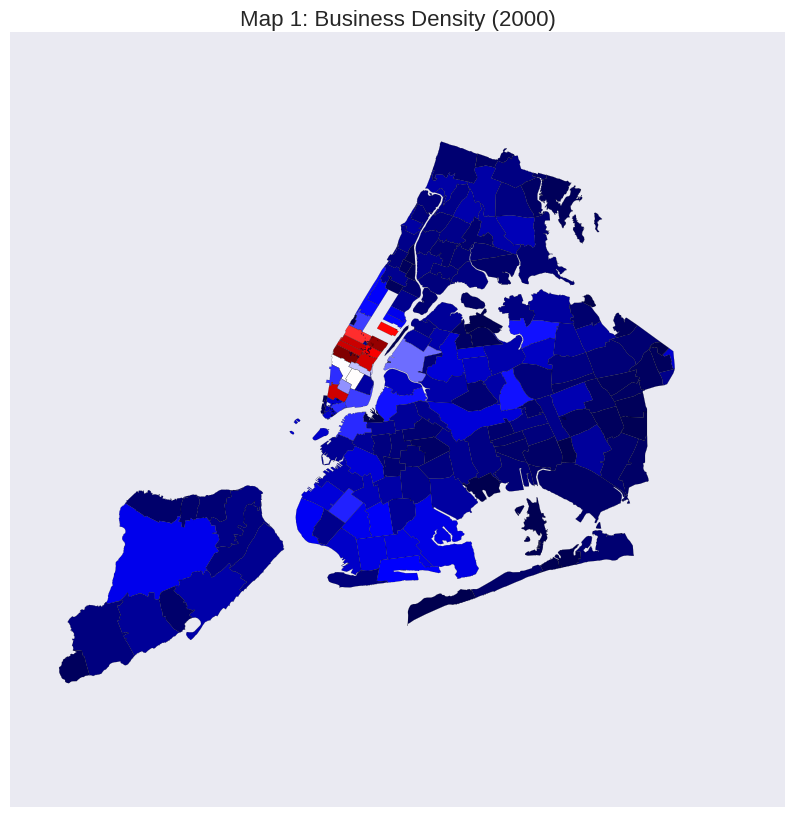

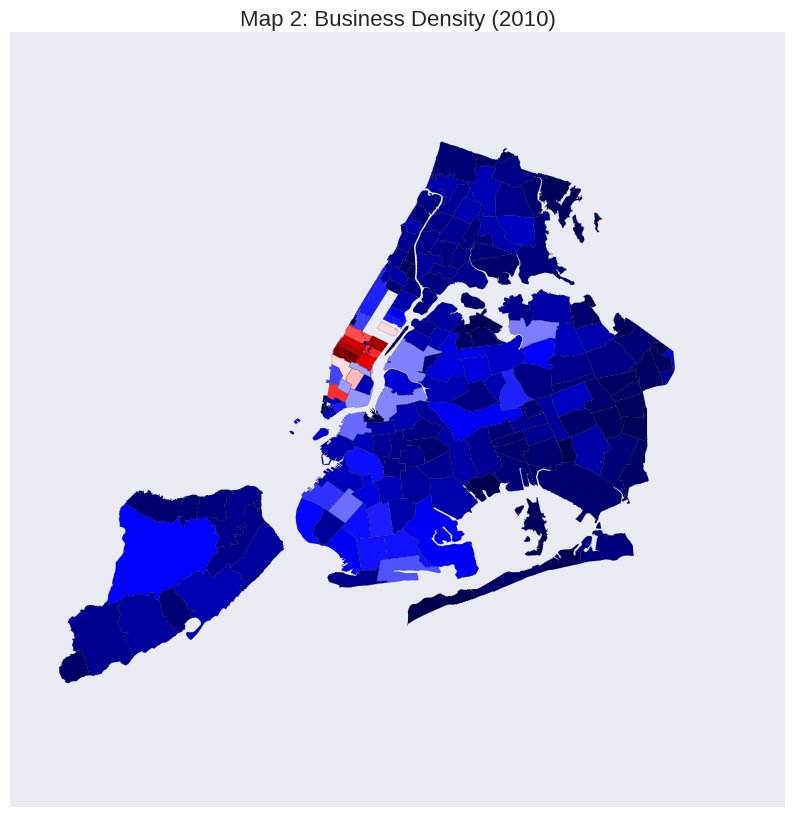

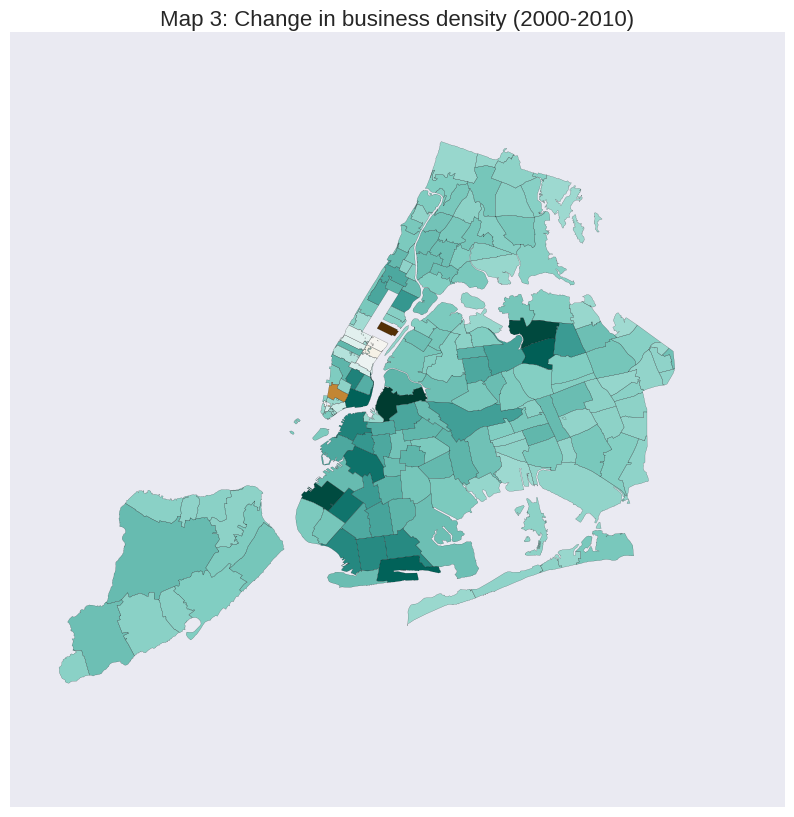

In [93]:
#For this portion of the task i used code from HW11
f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
biz.plot(column = 'd2000', colormap = 'seismic', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 1: Business Density (2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
biz.plot(column = 'd2010', colormap = 'seismic', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 2: Business Density (2010)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
biz.plot(column = 'difference', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 3: Change in business density (2000-2010)", fontsize = 16)

**Maps 1 and 2** display business density by zipcode for years 2000 and 2010. Among the project's early findings, it was possible to identified an increase in the number of commercial establishments between the two years. A special concentration of business could be highlighted from midtown south and downtown manhattan. 

**Map 3** display the change in density between 2000 and 2010. Significant change in density could be identified throughout the neighborhoods of Bay Ridge, Williamsburg, Downtown Manhattan and the East Side. 


4) Collect census data from the 2010 and 2000 census and extract the estimate (mean or median) age, population, and diversity of each census tract for all 5 NYC boroughs. The diversity (or lack thereof) can be measured by the fraction of white population.

In [94]:
#Downloaded census data from american Fact Finder and moved it to PUIDATA
census_2010 = pd.read_csv(os.getenv('PUIDATA') + '/' + 'ACS_10_5YR_DP05_with_ann.csv')

In [95]:
census_2010.head()

Id          Id2                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

   Estimate Margin of Error; SEX AND AGE - Total population  \
0                                                383          
1                                                542          
2                                                484          
3                                                401          
4                                                871          

   Percent; SEX AND AGE - Total population  \
0                                    11517   
1                                     4286   
2                                     4893   
3                                     5140   
4                                     2142   

  Percent Margin of Error; SEX AND AGE - Total population  \
0                                                (X)        
1                                                (X)        
2                                                (X)        
3                                                (X)        
4                                                (X)        

   Estimate; SEX AND AGE - Male  Estimate Margin of Error; SEX AND AGE - Male  \
0                         10337                                           373   
1                          2046                                           319   
2                          2490                                           293   
3                          2381                                           281   
4                          1406                                           851   

  Percent; SEX AND AGE - Male  \
0                        89.8   
1                        47.7   
2                        50.9   
3                        46.3   
4                        65.6   

                                      ...                                      \
0                                     ...                                       
1                                     ...                                       
2                                     ...                                       
3                                     ...                                       
4                                     ...                                       

  Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races including Some other race  \
0                                                0.3                                                                        
1                                                  0                                                                        
2                                                0.1                                                                        
3                                                  0                                                                        
4                                                  0                                                                        

   Percent Margin of Error; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races including Some other race  \
0                                                0.2                                                                                         
1                   

In [96]:
census_2010.columns

Index([u'Id', u'Id2', u'Geography',
       u'Estimate; SEX AND AGE - Total population',
       u'Estimate Margin of Error; SEX AND AGE - Total population',
       u'Percent; SEX AND AGE - Total population',
       u'Percent Margin of Error; SEX AND AGE - Total population',
       u'Estimate; SEX AND AGE - Male',
       u'Estimate Margin of Error; SEX AND AGE - Male',
       u'Percent; SEX AND AGE - Male',
       ...
       u'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races including Some other race',
       u'Percent Margin of Error; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races including Some other race',
       u'Estimate; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races excluding Some other race, and Three or more races',
       u'Estimate Margin of Error; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races - Two races excluding Some other race

In [97]:
census_2010 = census_2010[['Id', 'Id2', 'Geography', 'Estimate; SEX AND AGE - Total population', 'Estimate; SEX AND AGE - Median age (years)', 'Percent; RACE - Race alone or in combination with one or more other races - Total population', 'Estimate; RACE - White' ]]

In [98]:
census_2010.head()

Id          Id2                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

  Estimate; SEX AND AGE - Median age (years)  \
0                                       31.4   
1                                         29   
2                                       36.1   
3                                       40.2   
4                                         36   

   Percent; RACE - Race alone or in combination with one or more other races - Total population  \
0                                              11517                                              
1                                               4286                                              
2                                               4893                                              
3                                               5140                                              
4                                               2142                                              

   Estimate; RACE - White  
0                    1923  
1                     646  
2                     677  
3                    1050  
4                     803

In [99]:
#Finding percentage of white populaiton, it is an indicator of diversity
census_2010['diversity_2010'] = (census_2010['Estimate; RACE - White'] / census_2010['Estimate; SEX AND AGE - Total population']) * 100
census_2010.head()

Id          Id2                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

  Estimate; SEX AND AGE - Median age (years)  \
0                                       31.4   
1                                         29   
2                                       36.1   
3                                       40.2   
4                                         36   

   Percent; RACE - Race alone or in combination with one or more other races - Total population  \
0                                              11517                                              
1                                               4286                                              
2                                               4893                                              
3                                               5140                                              
4                                               2142                                              

   Estimate; RACE - White  diversity_2010  
0                    1923       16.697057  
1                     646       15.072329  
2                     677       13.836092  
3                    1050       20.428016  
4                     803       37.488329

In [100]:
census_2010.rename(columns = {'Id': 'GEOID_2010', 'Id2': 'GEOID'}, inplace = True)
census_2010.head()

GEOID_2010        GEOID                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

  Estimate; SEX AND AGE - Median age (years)  \
0                                       31.4   
1                                         29   
2                                       36.1   
3                                       40.2   
4                                         36   

   Percent; RACE - Race alone or in combination with one or more other races - Total population  \
0                                              11517                                              
1                                               4286                                              
2                                               4893                                              
3                                               5140                                              
4                                               2142                                              

   Estimate; RACE - White  diversity_2010  
0                    1923       16.697057  
1                     646       15.072329  
2                     677       13.836092  
3                    1050       20.428016  
4                     803       37.488329

In [101]:
#merging to optain geometry values from cartographic data
ctnyc_path="/home/cusp/jc7344/PUIdata/cb_2015_36_tract_500k.shp"
ct_shape = GeoDataFrame.from_file(ctnyc_path)
ct_shape.head()

AFFGEOID      ALAND   AWATER COUNTYFP        GEOID LSAD  \
0  1400000US36001000502     777446        0      001  36001000502   CT   
1  1400000US36001013507    5575232     2491      001  36001013507   CT   
2  1400000US36001014612    3072859      243      001  36001014612   CT   
3  1400000US36001014803  149682672  1926625      001  36001014803   CT   
4  1400000US36003940200    1528842    26577      003  36003940200   CT   

     NAME STATEFP TRACTCE                                           geometry  
0    5.02      36  000502  POLYGON ((-73.79496 42.66871, -73.790798999999...  
1  135.07      36  013507  POLYGON ((-73.802734 42.763943, -73.796492 42....  
2  146.12      36  014612  POLYGON ((-74.045469 42.711973, -74.0415709999...  
3  148.03      36  014803  POLYGON ((-74.11678499999999 42.551517, -74.09...  
4    9402      36  940200  POLYGON ((-78.309316 42.231684, -78.309145 42....

In [102]:
ct_shape['GEOID'] = pd.to_numeric(ct_shape['GEOID'])
ct_shape['GEOID'].head()

0    36001000502
1    36001013507
2    36001014612
3    36001014803
4    36003940200
Name: GEOID, dtype: int64

In [103]:
merged2010 = pd.merge(census_2010, ct_shape, on='GEOID')
merged2010.head()

GEOID_2010        GEOID                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

  Estimate; SEX AND AGE - Median age (years)  \
0                                       31.4   
1                                         29   
2                                       36.1   
3                                       40.2   
4                                         36   

   Percent; RACE - Race alone or in combination with one or more other races - Total population  \
0                                              11517                                              
1                                               4286                                              
2                                               4893                                              
3                                               5140                                              
4                                               2142                                              

   Estimate; RACE - White  diversity_2010              AFFGEOID    ALAND  \
0                    1923       16.697057  1400000US36005000100  1677210   
1                     646       15.072329  1400000US36005000200   479463   
2                     677       13.836092  1400000US36005000400   770689   
3                    1050       20.428016  1400000US36005001600   485079   
4                     803       37.488329  1400000US36005001900  1668013   

    AWATER COUNTYFP LSAD NAME STATEFP TRACTCE  \
0  1035011      005   CT    1      36  000100   
1   852046      005   CT    2      36  000200   
2   690794      005   CT    4      36  000400   
3        0      005   CT   16      36  001600   
4  1143135      005   CT   19      36  001900   

                                            geometry  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  
1  POLYGON ((-73.865218 40.814529, -73.864255 40....  
2  POLYGON ((-73.85870299999999 40.815405, -73.85...  
3  POLYGON ((-73.862464 40.819247, -73.861531 40....  
4  POLYGON ((-73.930938 40.808253, -73.929219 40....

5) Collect the income data by census tract from the income from American Fact Finder for the years 2010 and 2000 at the census tract level.

After extracting the needed information for 2010 from American Fact Finder. I used one of Professor Bianco's already processed data to obtain information for 2000.

In [104]:
#Median income by census tract from American Fact Finder 
income2010 = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'ACS_10_5YR_S1903_with_ann.csv')

In [105]:
income2010.rename(columns = {'GEO.id2':'GEOID'}, inplace = True)
income2010.head()

GEO.id        GEOID                        GEO.display-label  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

  HC02_EST_VC02  
0             -  
1         59826  
2         71968  
3         30355  
4         25093

In [106]:
data2010 = pd.merge(merged2010, income2010, on='GEOID')
data2010.head()

GEOID_2010        GEOID                                Geography  \
0  1400000US36005000100  36005000100   Census Tract 1, Bronx County, New York   
1  1400000US36005000200  36005000200   Census Tract 2, Bronx County, New York   
2  1400000US36005000400  36005000400   Census Tract 4, Bronx County, New York   
3  1400000US36005001600  36005001600  Census Tract 16, Bronx County, New York   
4  1400000US36005001900  36005001900  Census Tract 19, Bronx County, New York   

   Estimate; SEX AND AGE - Total population  \
0                                     11517   
1                                      4286   
2                                      4893   
3                                      5140   
4                                      2142   

  Estimate; SEX AND AGE - Median age (years)  \
0                                       31.4   
1                                         29   
2                                       36.1   
3                                       40.2   
4                                         36   

   Percent; RACE - Race alone or in combination with one or more other races - Total population  \
0                                              11517                                              
1                                               4286                                              
2                                               4893                                              
3                                               5140                                              
4                                               2142                                              

   Estimate; RACE - White  diversity_2010              AFFGEOID    ALAND  \
0                    1923       16.697057  1400000US36005000100  1677210   
1                     646       15.072329  1400000US36005000200   479463   
2                     677       13.836092  1400000US36005000400   770689   
3                    1050       20.428016  1400000US36005001600   485079   
4                     803       37.488329  1400000US36005001900  1668013   

    AWATER COUNTYFP LSAD NAME STATEFP TRACTCE  \
0  1035011      005   CT    1      36  000100   
1   852046      005   CT    2      36  000200   
2   690794      005   CT    4      36  000400   
3        0      005   CT   16      36  001600   
4  1143135      005   CT   19      36  001900   

                                            geometry                GEO.id  \
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  1400000US36005000100   
1  POLYGON ((-73.865218 40.814529, -73.864255 40....  1400000US36005000200   
2  POLYGON ((-73.85870299999999 40.815405, -73.85...  1400000US36005000400   
3  POLYGON ((-73.862464 40.819247, -73.861531 40....  1400000US36005001600   
4  POLYGON ((-73.930938 40.808253, -73.929219 40....  1400000US36005001900   

                         GEO.display-label HC02_EST_VC02  
0   Census Tract 1, Bronx County, New York             -  
1   Census Tract 2, Bronx County, New York         59826  
2   Census Tract 4, Bronx County, New York         71968  
3  Census Tract 16, Bronx County, New York         30355  
4  Census Tract 19, Bronx County, New York         25093

In [107]:
data2010 = data2010[['GEOID','Estimate; SEX AND AGE - Total population','Estimate; SEX AND AGE - Median age (years)','diversity_2010','geometry','HC02_EST_VC02']]
data2010.rename(columns = {'Estimate; SEX AND AGE - Total population':'population_2010', 'Estimate; SEX AND AGE - Median age (years)':'age_2010', 'HC02_EST_VC02':'income_2010'}, inplace = True)
data2010.head()

GEOID  population_2010 age_2010  diversity_2010  \
0  36005000100            11517     31.4       16.697057   
1  36005000200             4286       29       15.072329   
2  36005000400             4893     36.1       13.836092   
3  36005001600             5140     40.2       20.428016   
4  36005001900             2142       36       37.488329   

                                            geometry income_2010  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....           -  
1  POLYGON ((-73.865218 40.814529, -73.864255 40....       59826  
2  POLYGON ((-73.85870299999999 40.815405, -73.85...       71968  
3  POLYGON ((-73.862464 40.819247, -73.861531 40....       30355  
4  POLYGON ((-73.930938 40.808253, -73.929219 40....       25093

In [108]:
#Data for 2000 was obtained through professor Bianco's link 
!wget http://cosmo.nyu.edu/~fb55/PUI2016/data/census00_final.json

--2016-12-20 08:34:45--  http://cosmo.nyu.edu/~fb55/PUI2016/data/census00_final.json
Resolving cosmo.nyu.edu... 128.122.53.240
Connecting to cosmo.nyu.edu|128.122.53.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390908 (382K) [application/json]
Saving to: “census00_final.json.25”

100%[======================================>] 390,908     --.-K/s   in 0.005s  

2016-12-20 08:34:45 (72.2 MB/s) - “census00_final.json.25” saved [390908/390908]



In [109]:
census2000 = pd.read_json('census00_final.json')
census2000.head()

age  diversity                geo_id   income  population
0      0.0        NaN  1400000US36047054300      NaN           0
1      0.0        NaN  1400000US36081121100      NaN           0
10    47.5       34.0  1400000US36029001401  18125.0         106
100   39.3       89.2  1400000US36001001901  52093.0        2656
1000  40.9       98.7  1400000US36029013800  55842.0        7663

In [110]:
census2000.rename(columns = {'geo_id':'AFFGEOID', 'population':'population_2000', 'age':'age_2000', 'income':'income_2000', 'diversity':'diversity_2000'}, inplace = True)
census2000.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0          0.0             NaN  1400000US36047054300          NaN   
1          0.0             NaN  1400000US36081121100          NaN   
10        47.5            34.0  1400000US36029001401      18125.0   
100       39.3            89.2  1400000US36001001901      52093.0   
1000      40.9            98.7  1400000US36029013800      55842.0   

      population_2000  
0                   0  
1                   0  
10                106  
100              2656  
1000             7663

In [111]:
ctnyc00_path="/home/cusp/jc7344/PUIdata/cb_2015_36_tract_500k.shp"
ct00_shape = GeoDataFrame.from_file(ctnyc00_path)
ct00_shape.head()

AFFGEOID      ALAND   AWATER COUNTYFP        GEOID LSAD  \
0  1400000US36001000502     777446        0      001  36001000502   CT   
1  1400000US36001013507    5575232     2491      001  36001013507   CT   
2  1400000US36001014612    3072859      243      001  36001014612   CT   
3  1400000US36001014803  149682672  1926625      001  36001014803   CT   
4  1400000US36003940200    1528842    26577      003  36003940200   CT   

     NAME STATEFP TRACTCE                                           geometry  
0    5.02      36  000502  POLYGON ((-73.79496 42.66871, -73.790798999999...  
1  135.07      36  013507  POLYGON ((-73.802734 42.763943, -73.796492 42....  
2  146.12      36  014612  POLYGON ((-74.045469 42.711973, -74.0415709999...  
3  148.03      36  014803  POLYGON ((-74.11678499999999 42.551517, -74.09...  
4    9402      36  940200  POLYGON ((-78.309316 42.231684, -78.309145 42....

In [112]:
ct00_shape = ct00_shape.drop(['ALAND','AWATER','COUNTYFP',
                                    'LSAD','NAME','STATEFP','TRACTCE']
                                   , axis = 1)
ct00_shape.head()

AFFGEOID        GEOID  \
0  1400000US36001000502  36001000502   
1  1400000US36001013507  36001013507   
2  1400000US36001014612  36001014612   
3  1400000US36001014803  36001014803   
4  1400000US36003940200  36003940200   

                                            geometry  
0  POLYGON ((-73.79496 42.66871, -73.790798999999...  
1  POLYGON ((-73.802734 42.763943, -73.796492 42....  
2  POLYGON ((-74.045469 42.711973, -74.0415709999...  
3  POLYGON ((-74.11678499999999 42.551517, -74.09...  
4  POLYGON ((-78.309316 42.231684, -78.309145 42....

In [113]:
merged2000 = pd.merge(census2000, ct00_shape, on='AFFGEOID')
merged2000.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0       0.0             NaN  1400000US36047054300          NaN   
1       0.0             NaN  1400000US36081121100          NaN   
2      39.3            89.2  1400000US36001001901      52093.0   
3      40.9            98.7  1400000US36029013800      55842.0   
4      38.2            99.3  1400000US36029013900      49948.0   

   population_2000        GEOID  \
0                0  36047054300   
1                0  36081121100   
2             2656  36001001901   
3             7663  36029013800   
4             2333  36029013900   

                                            geometry  
0  POLYGON ((-73.980729 40.701268, -73.9791709999...  
1  POLYGON ((-73.81375799999999 40.745746, -73.81...  
2  POLYGON ((-73.80173499999999 42.652502, -73.79...  
3  POLYGON ((-78.696957 42.765795, -78.69677 42.7...  
4  POLYGON ((-78.632037 42.76433, -78.62976399999...

In [114]:
merged2000.dtypes

age_2000           float64
diversity_2000     float64
AFFGEOID            object
income_2000        float64
population_2000      int64
GEOID               object
geometry            object
dtype: object

6) Merge the datasets for each year and show a the tables containing the relevant data: the features and whatever else you need to identify and plot the data.

In [115]:
#Here i followed the hints about assignment
merged2000['GEOID_num'] = merged2000['GEOID'].str[-9:]
merged2000.drop('GEOID', axis=1, inplace=True)
merged2000['county'] = merged2000['GEOID_num'].str[:3]
merged2000.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0       0.0             NaN  1400000US36047054300          NaN   
1       0.0             NaN  1400000US36081121100          NaN   
2      39.3            89.2  1400000US36001001901      52093.0   
3      40.9            98.7  1400000US36029013800      55842.0   
4      38.2            99.3  1400000US36029013900      49948.0   

   population_2000                                           geometry  \
0                0  POLYGON ((-73.980729 40.701268, -73.9791709999...   
1                0  POLYGON ((-73.81375799999999 40.745746, -73.81...   
2             2656  POLYGON ((-73.80173499999999 42.652502, -73.79...   
3             7663  POLYGON ((-78.696957 42.765795, -78.69677 42.7...   
4             2333  POLYGON ((-78.632037 42.76433, -78.62976399999...   

   GEOID_num county  
0  047054300    047  
1  081121100    081  
2  001001901    001  
3  029013800    029  
4  029013900    029

In [116]:
merged2000 = merged2000.loc[merged2000['county'].isin(['005', '047', '061', '081', '085'])]
merged2000.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0         0.0             NaN  1400000US36047054300          NaN   
1         0.0             NaN  1400000US36081121100          NaN   
140      37.5            75.3  1400000US36047000100      63333.0   
141      25.3            33.5  1400000US36047000200      29219.0   
142      38.7            84.1  1400000US36047000301      83739.0   

     population_2000                                           geometry  \
0                  0  POLYGON ((-73.980729 40.701268, -73.9791709999...   
1                  0  POLYGON ((-73.81375799999999 40.745746, -73.81...   
140             5260  POLYGON ((-73.99669799999999 40.700877, -73.99...   
141             1303  POLYGON ((-74.012844 40.653016, -74.0150479999...   
142             5036  POLYGON ((-74.000277 40.694959, -73.999461 40....   

     GEOID_num county  
0    047054300    047  
1    081121100    081  
140  047000100    047  
141  047000200    047  
142  047000301    047

In [117]:
data2010.head()

GEOID  population_2010 age_2010  diversity_2010  \
0  36005000100            11517     31.4       16.697057   
1  36005000200             4286       29       15.072329   
2  36005000400             4893     36.1       13.836092   
3  36005001600             5140     40.2       20.428016   
4  36005001900             2142       36       37.488329   

                                            geometry income_2010  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....           -  
1  POLYGON ((-73.865218 40.814529, -73.864255 40....       59826  
2  POLYGON ((-73.85870299999999 40.815405, -73.85...       71968  
3  POLYGON ((-73.862464 40.819247, -73.861531 40....       30355  
4  POLYGON ((-73.930938 40.808253, -73.929219 40....       25093

In [118]:
data2010.dtypes

GEOID                int64
population_2010      int64
age_2010            object
diversity_2010     float64
geometry            object
income_2010         object
dtype: object

In [119]:
data2010['GEOID'] = data2010['GEOID'].astype(str)

In [120]:
data2010['GEOID_1'] = data2010['GEOID'].str[-9:]
data2010.drop('GEOID', axis=1, inplace=True)
data2010['county'] = data2010['GEOID_1'].str[:3]
data2010.head()

population_2010 age_2010  diversity_2010  \
0            11517     31.4       16.697057   
1             4286       29       15.072329   
2             4893     36.1       13.836092   
3             5140     40.2       20.428016   
4             2142       36       37.488329   

                                            geometry income_2010    GEOID_1  \
0  POLYGON ((-73.892504 40.801206, -73.872264 40....           -  005000100   
1  POLYGON ((-73.865218 40.814529, -73.864255 40....       59826  005000200   
2  POLYGON ((-73.85870299999999 40.815405, -73.85...       71968  005000400   
3  POLYGON ((-73.862464 40.819247, -73.861531 40....       30355  005001600   
4  POLYGON ((-73.930938 40.808253, -73.929219 40....       25093  005001900   

  county  
0    005  
1    005  
2    005  
3    005  
4    005

In [121]:
#I changed back to facilate merge
data2010.rename(columns = {'GEOID_1':'GEOID_num'}, inplace = True)
data2010.head()

population_2010 age_2010  diversity_2010  \
0            11517     31.4       16.697057   
1             4286       29       15.072329   
2             4893     36.1       13.836092   
3             5140     40.2       20.428016   
4             2142       36       37.488329   

                                            geometry income_2010  GEOID_num  \
0  POLYGON ((-73.892504 40.801206, -73.872264 40....           -  005000100   
1  POLYGON ((-73.865218 40.814529, -73.864255 40....       59826  005000200   
2  POLYGON ((-73.85870299999999 40.815405, -73.85...       71968  005000400   
3  POLYGON ((-73.862464 40.819247, -73.861531 40....       30355  005001600   
4  POLYGON ((-73.930938 40.808253, -73.929219 40....       25093  005001900   

  county  
0    005  
1    005  
2    005  
3    005  
4    005

7) Merge the df with the census tracts shapefile (see DATA and HINTS files) and display each of your features as a choropleth for both 2010 and 2000, and show the difference in the features as a third choroplath

In [122]:
data2010['age_2010'] = pd.to_numeric(data2010['age_2010'], errors='coerce' )
data2010['age_2010'].head()

0    31.4
1    29.0
2    36.1
3    40.2
4    36.0
Name: age_2010, dtype: float64

In [123]:
data2010['income_2010'] = pd.to_numeric(data2010['income_2010'], errors='coerce' )
data2010['income_2010'].head()

0        NaN
1    59826.0
2    71968.0
3    30355.0
4    25093.0
Name: income_2010, dtype: float64

In [124]:
data_change = pd.merge(merged2000, data2010, how='inner', on=['GEOID_num'])
data_change.rename(columns = {'geometry_x': 'geometry'}, inplace = True)
data_change.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0       0.0             NaN  1400000US36047054300          NaN   
1       0.0             NaN  1400000US36081121100          NaN   
2      37.5            75.3  1400000US36047000100      63333.0   
3      25.3            33.5  1400000US36047000200      29219.0   
4      38.7            84.1  1400000US36047000301      83739.0   

   population_2000                                           geometry  \
0                0  POLYGON ((-73.980729 40.701268, -73.9791709999...   
1                0  POLYGON ((-73.81375799999999 40.745746, -73.81...   
2             5260  POLYGON ((-73.99669799999999 40.700877, -73.99...   
3             1303  POLYGON ((-74.012844 40.653016, -74.0150479999...   
4             5036  POLYGON ((-74.000277 40.694959, -73.999461 40....   

   GEOID_num county_x  population_2010  age_2010  diversity_2010  \
0  047054300      047              127      30.3      100.000000   
1  081121100      081                0       NaN             NaN   
2  047000100      047             4576      41.8       72.399476   
3  047000200      047             1014      38.7       37.771203   
4  047000301      047             4835      38.0       85.894519   

                                          geometry_y  income_2010 county_y  
0  POLYGON ((-73.980729 40.701268, -73.9791709999...      31591.0      047  
1  POLYGON ((-73.81375799999999 40.745746, -73.81...          NaN      081  
2  POLYGON ((-73.99669799999999 40.700877, -73.99...      85396.0      047  
3  POLYGON ((-74.012844 40.653016, -74.0150479999...      54688.0      047  
4  POLYGON ((-74.000277 40.694959, -73.999461 40....     160833.0      047

In [125]:
#After declaring the attribute that will be the center of my merge, I proceed to identify change in age, income, diversity and population
data_change['age'] = data_change['age_2010'] - data_change['age_2000']
data_change['income'] = data_change['income_2010'] - data_change['income_2000']
data_change['population'] = data_change['population_2010'] - data_change['population_2000']
data_change['diversity'] = data_change['diversity_2010'] - data_change['diversity_2000']
data_change.head()

age_2000  diversity_2000              AFFGEOID  income_2000  \
0       0.0             NaN  1400000US36047054300          NaN   
1       0.0             NaN  1400000US36081121100          NaN   
2      37.5            75.3  1400000US36047000100      63333.0   
3      25.3            33.5  1400000US36047000200      29219.0   
4      38.7            84.1  1400000US36047000301      83739.0   

   population_2000                                           geometry  \
0                0  POLYGON ((-73.980729 40.701268, -73.9791709999...   
1                0  POLYGON ((-73.81375799999999 40.745746, -73.81...   
2             5260  POLYGON ((-73.99669799999999 40.700877, -73.99...   
3             1303  POLYGON ((-74.012844 40.653016, -74.0150479999...   
4             5036  POLYGON ((-74.000277 40.694959, -73.999461 40....   

   GEOID_num county_x  population_2010  age_2010  diversity_2010  \
0  047054300      047              127      30.3      100.000000   
1  081121100      081                0       NaN             NaN   
2  047000100      047             4576      41.8       72.399476   
3  047000200      047             1014      38.7       37.771203   
4  047000301      047             4835      38.0       85.894519   

                                          geometry_y  income_2010 county_y  \
0  POLYGON ((-73.980729 40.701268, -73.9791709999...      31591.0      047   
1  POLYGON ((-73.81375799999999 40.745746, -73.81...          NaN      081   
2  POLYGON ((-73.99669799999999 40.700877, -73.99...      85396.0      047   
3  POLYGON ((-74.012844 40.653016, -74.0150479999...      54688.0      047   
4  POLYGON ((-74.000277 40.694959, -73.999461 40....     160833.0      047   

    age   income  population  diversity  
0  30.3      NaN         127        NaN  
1   NaN      NaN           0        NaN  
2   4.3  22063.0        -684  -2.900524  
3  13.4  25469.0        -289   4.271203  
4  -0.7  77094.0        -201   1.794519

In [126]:
data_change = data_change[['GEOID_num', 'age', 'diversity', 'income', 'population','geometry','county_y']]
data_change.head()

GEOID_num   age  diversity   income  population  \
0  047054300  30.3        NaN      NaN         127   
1  081121100   NaN        NaN      NaN           0   
2  047000100   4.3  -2.900524  22063.0        -684   
3  047000200  13.4   4.271203  25469.0        -289   
4  047000301  -0.7   1.794519  77094.0        -201   

                                            geometry county_y  
0  POLYGON ((-73.980729 40.701268, -73.9791709999...      047  
1  POLYGON ((-73.81375799999999 40.745746, -73.81...      081  
2  POLYGON ((-73.99669799999999 40.700877, -73.99...      047  
3  POLYGON ((-74.012844 40.653016, -74.0150479999...      047  
4  POLYGON ((-74.000277 40.694959, -73.999461 40....      047

In [127]:
data_change.rename(columns = {'county_y': 'county'}, inplace = True)
data_change.head()

GEOID_num   age  diversity   income  population  \
0  047054300  30.3        NaN      NaN         127   
1  081121100   NaN        NaN      NaN           0   
2  047000100   4.3  -2.900524  22063.0        -684   
3  047000200  13.4   4.271203  25469.0        -289   
4  047000301  -0.7   1.794519  77094.0        -201   

                                            geometry county  
0  POLYGON ((-73.980729 40.701268, -73.9791709999...    047  
1  POLYGON ((-73.81375799999999 40.745746, -73.81...    081  
2  POLYGON ((-73.99669799999999 40.700877, -73.99...    047  
3  POLYGON ((-74.012844 40.653016, -74.0150479999...    047  
4  POLYGON ((-74.000277 40.694959, -73.999461 40....    047

In [128]:
data_change = data_change.loc[data_change['county'].isin(['005', '047', '061', '081', '085'])]
data_change.head()

GEOID_num   age  diversity   income  population  \
0  047054300  30.3        NaN      NaN         127   
1  081121100   NaN        NaN      NaN           0   
2  047000100   4.3  -2.900524  22063.0        -684   
3  047000200  13.4   4.271203  25469.0        -289   
4  047000301  -0.7   1.794519  77094.0        -201   

                                            geometry county  
0  POLYGON ((-73.980729 40.701268, -73.9791709999...    047  
1  POLYGON ((-73.81375799999999 40.745746, -73.81...    081  
2  POLYGON ((-73.99669799999999 40.700877, -73.99...    047  
3  POLYGON ((-74.012844 40.653016, -74.0150479999...    047  
4  POLYGON ((-74.000277 40.694959, -73.999461 40....    047

In order to plot all the merged data, it is necessary to state that all the info is part of a Geo Data frame

In [129]:
df = gp.GeoDataFrame(data_change)

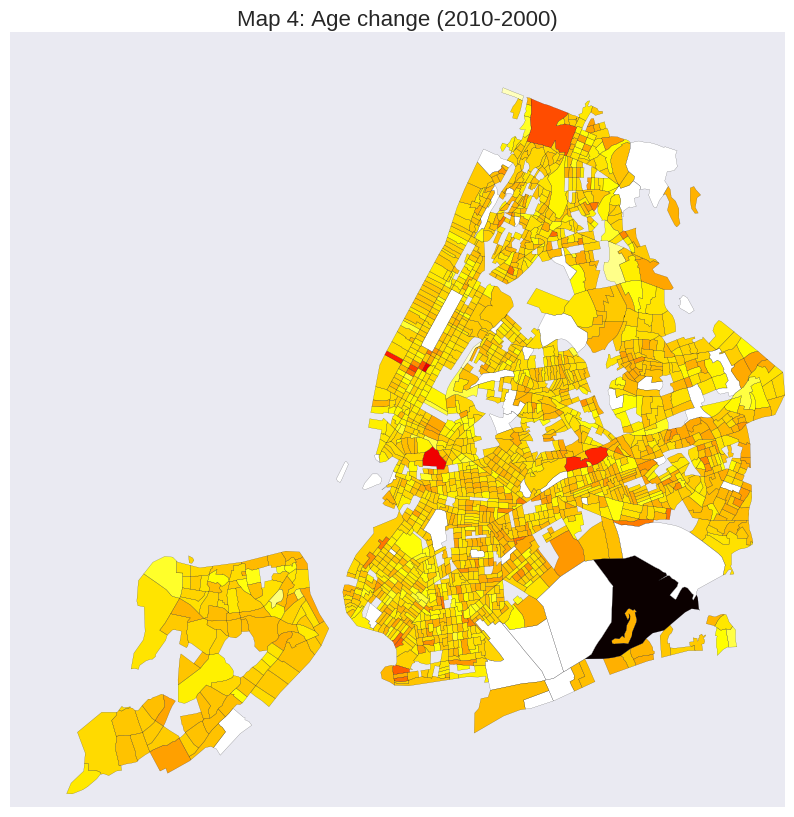

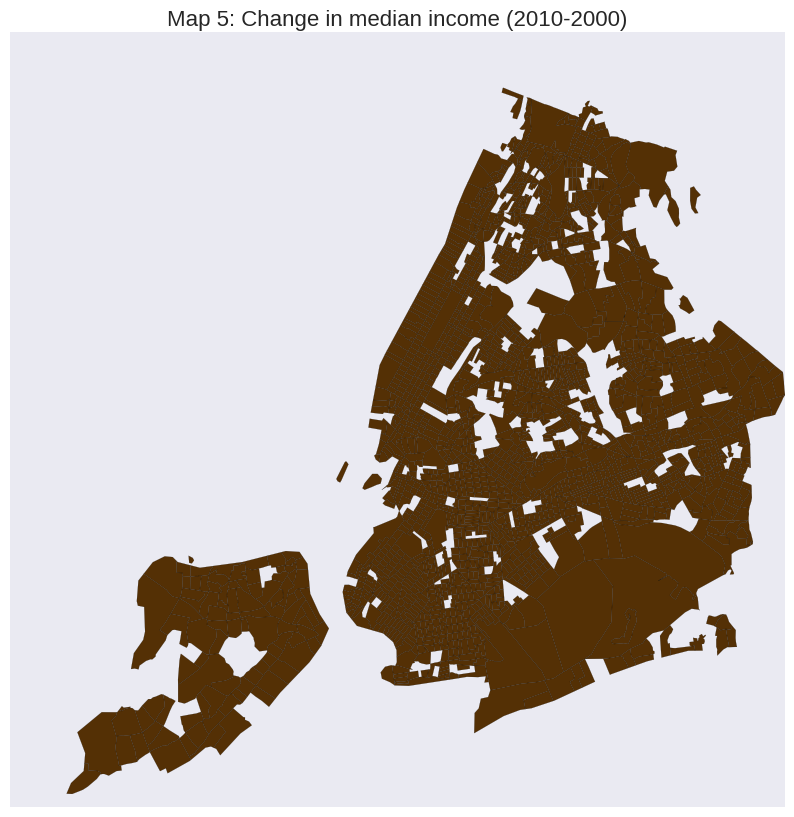

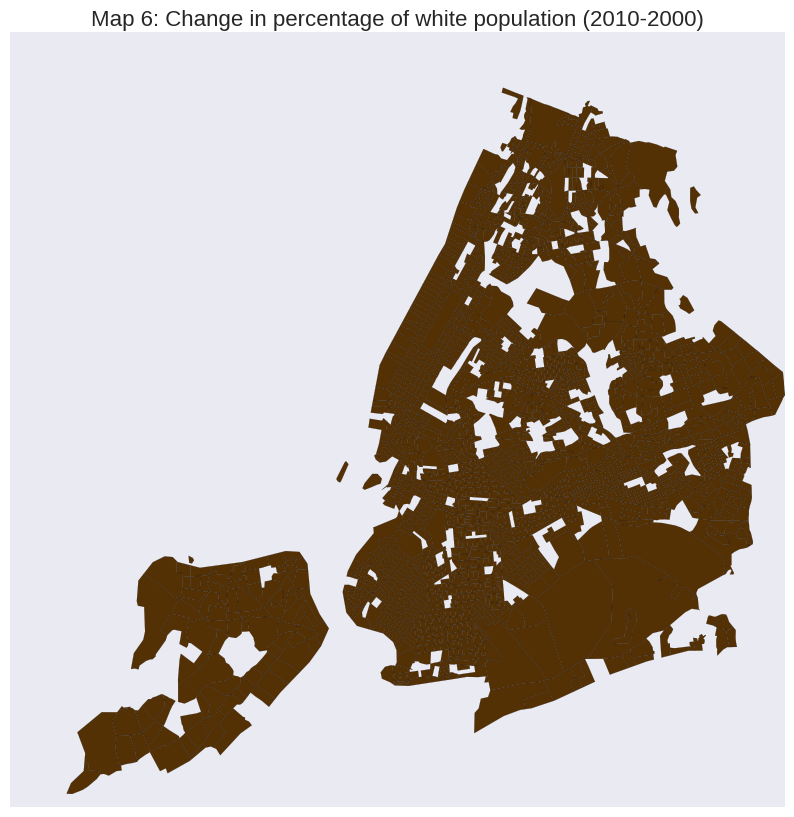

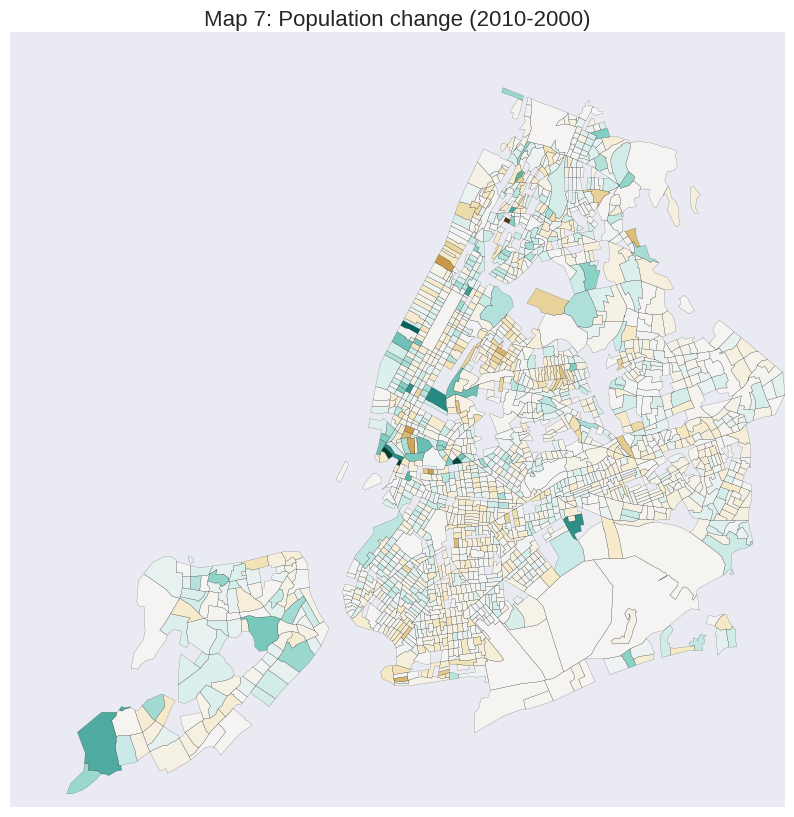

In [130]:
f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column = 'age', colormap = 'hot_r', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 4: Age change (2010-2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column = 'income', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 5: Change in median income (2010-2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column = 'diversity', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 6: Change in percentage of white population (2010-2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column = 'population', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 7: Population change (2010-2000)", fontsize = 16)


**Maps 4 and 7:** The maps above display the change in two out of the four fueatures. The first one, highlights the presence of younger segments of the populaiton in Donwtown Manhattan, the Lower East Side and most of north Brooklyn. Portions of Midtown Manhattan, specific parts of Queens and the Bronx, contained older population in 2010 than in 2000. 

Map 7, displays increasingly larger segments of the population throughout the neighborhoods of Greenpoint, Williamsburg and Bushwick. On the other side of the spectrum, it is possible to highlight parts of Canarsie and the southern portion of Brooklyn. 

-Maps 5 and 6 Do not display the information contained in the processed data. Further work on diversity and income changes is needed in order to visualize all selected features. 

In [131]:
df1 = gp.GeoDataFrame(merged2000)

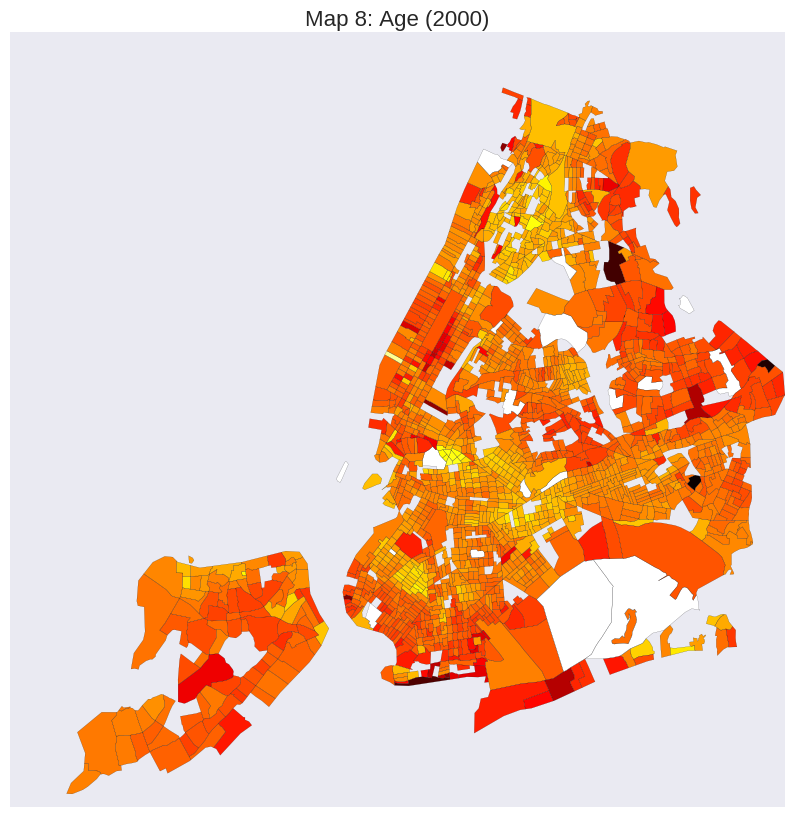

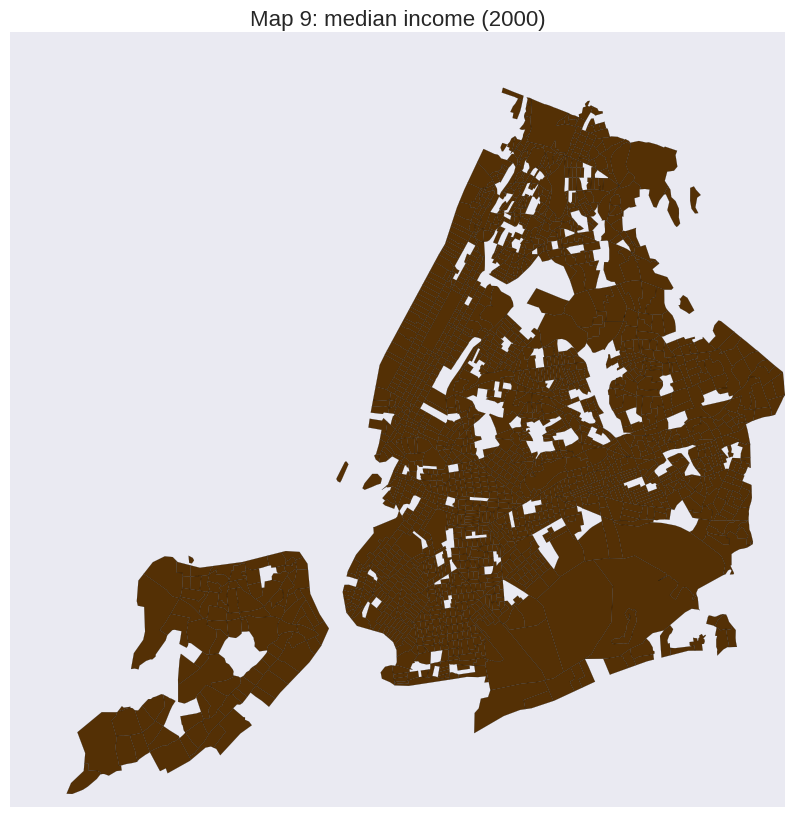

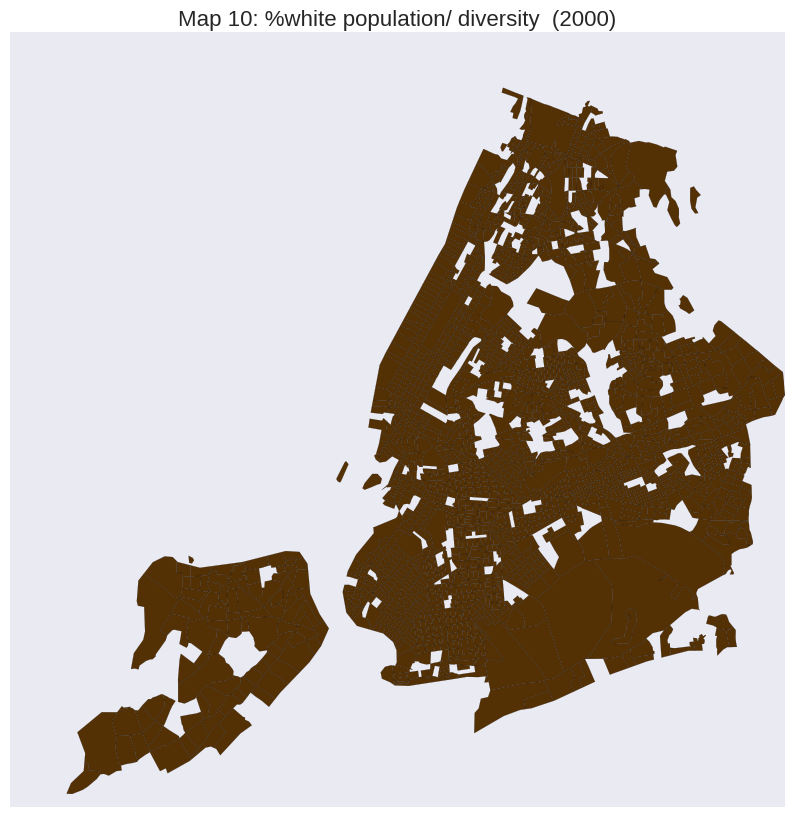

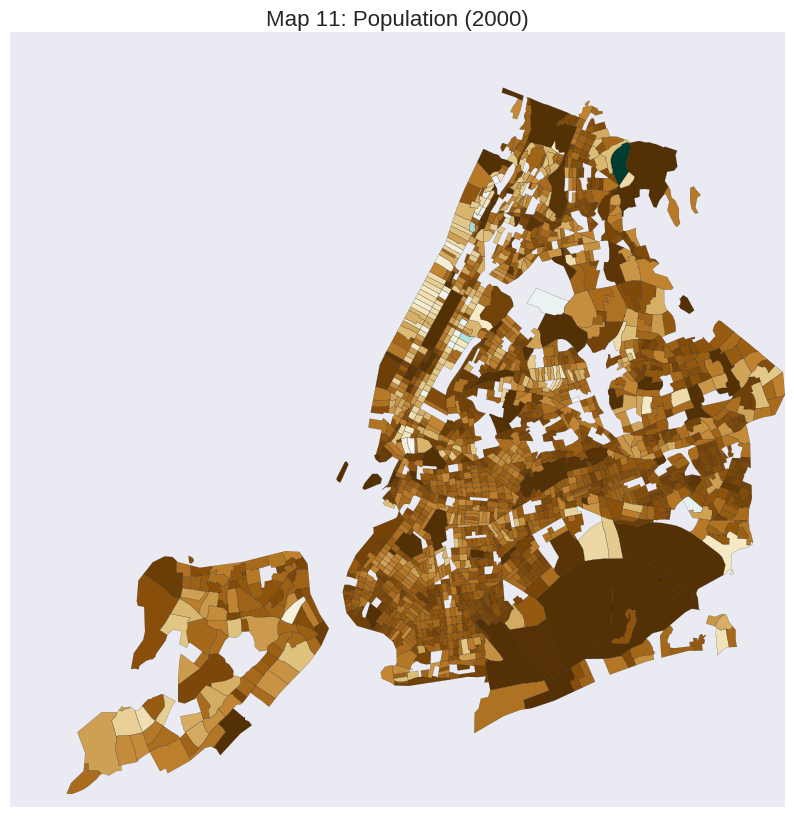

In [132]:
# Plotting 2000 values 
f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df1.plot(column = 'age_2000', colormap = 'hot_r', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 8: Age (2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df1.plot(column = 'income_2000', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 9: median income (2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df1.plot(column = 'diversity_2000', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 10: %white population/ diversity  (2000)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df1.plot(column = 'population_2000', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 11: Population (2000)", fontsize = 16)

**Caption Map 8-11:** Above, a concentration of older people could be identified (on the census tract level) in most of midtown and upper Manhattan. The Williamsbur, Greepoint, Bushwick areas start contain yonger segments of the population. This is also the case of the Bed-Stuy/Clinton Hill areas, where a first gentrification process is identified in the begining of the 2000's.

In [133]:
df2 = gp.GeoDataFrame(data2010)

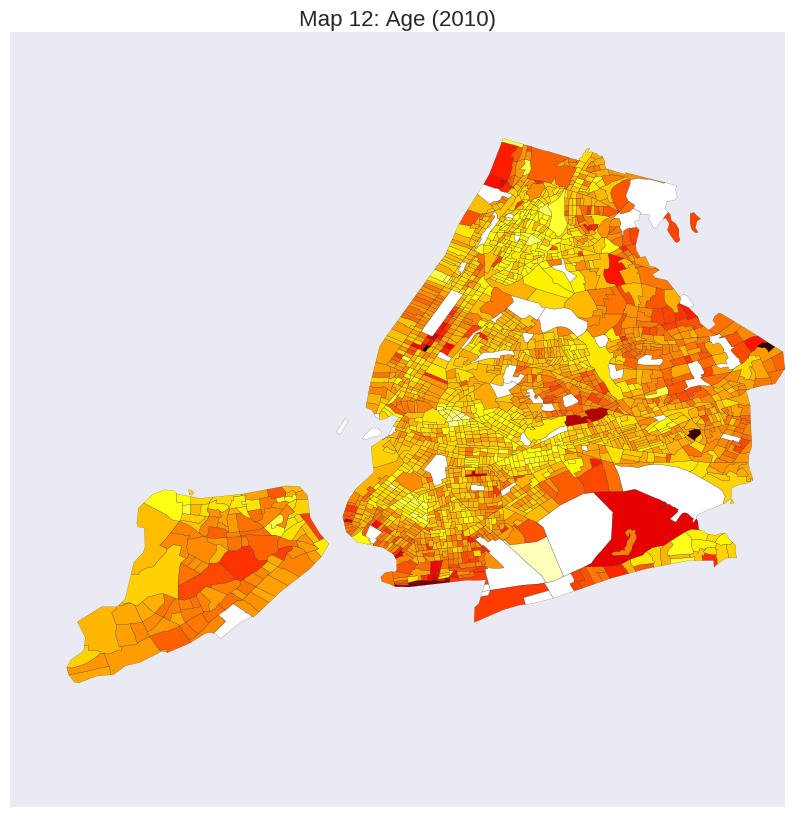

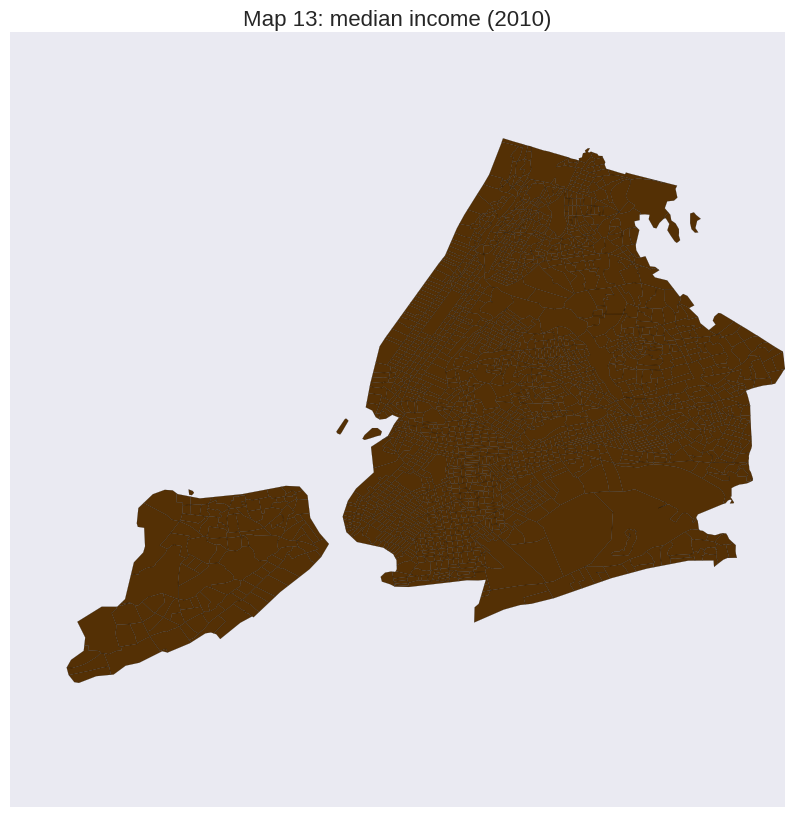

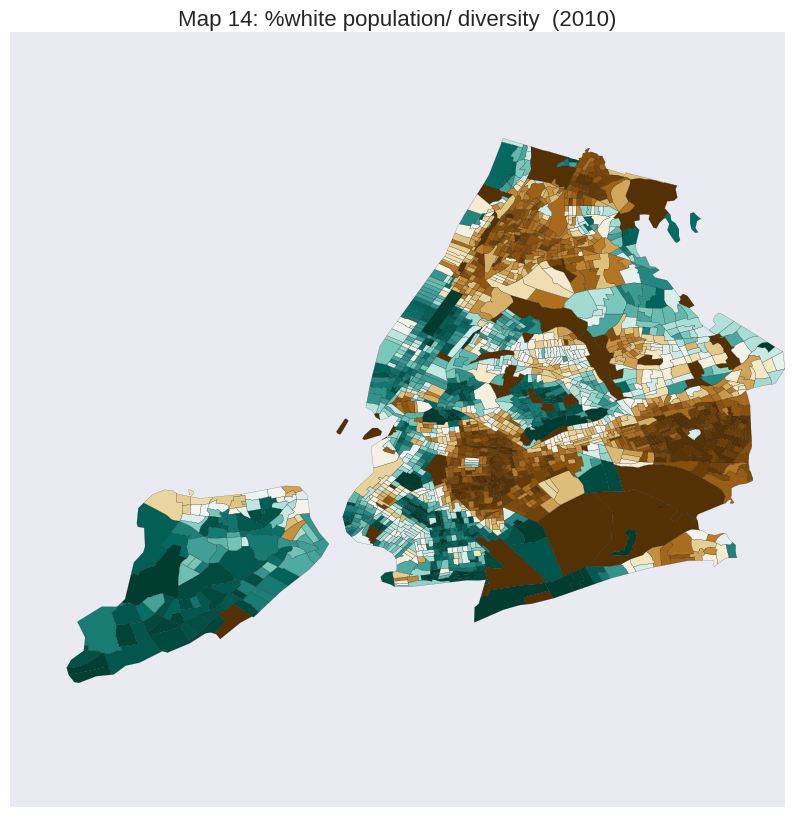

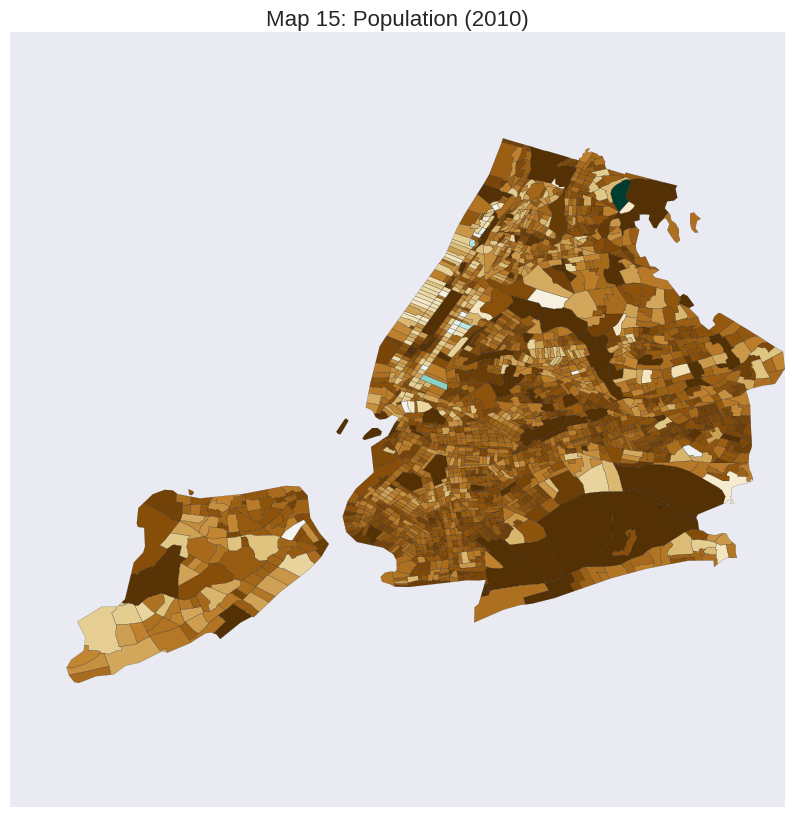

In [134]:
# Plotting 2000 values 
f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df2.plot(column = 'age_2010', colormap = 'hot_r', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 12: Age (2010)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df2.plot(column = 'income_2010', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 13: median income (2010)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df2.plot(column = 'diversity_2010', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 14: %white population/ diversity  (2010)", fontsize = 16)

f, ax = plt.subplots(figsize = (10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df2.plot(column = 'population_2010', colormap = 'BrBG', alpha = 1, linewidth = 0.1, ax = ax)
plt.title("Map 15: Population (2010)", fontsize = 16)

**Caption Maps 12, 14 , 15:** Above, a greater portion of young population is located around the areas surounding the borough of Manhattan. It could be possible to establish a relationship between this distributions and the existances of specific segments of the community being out-priced in specific neighborhoods of Manhattan. This issue could explain the presence of larger shares of the population in north, east, and south Brooklyn.

This distribution, however, shows low levels of diversity. While it is truth that younger ('whiter')people were then located in "close" proximity to Manhattan, members of other races were located in East Brooklyn (and Canarsie), south Queens and Nothern Manhattan (Harlem) and the Bronx.


10) Aggregate the census four features at the zipcode level and merge the zipcode dataframe

In [135]:
zc_shape = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zc_shape.head()

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS    Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  2.016328e+07  20624.692317   
1         2        Glen Oaks    NY      36  2.260653e+07  23002.816039   
2         3    New Hyde Park    NY      36  6.269333e+06  15749.161511   
3         4        Bellerose    NY      36  4.941836e+07  35932.810639   
4         5    Fresh Meadows    NY      36  6.938587e+07  38693.565676   

  borough                                           geometry postalCode  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372  
1  Queens  POLYGON ((-73.71068374074007 40.75004039450917...      11004  
2  Queens  POLYGON ((-73.70098278625547 40.73889569923034...      11040  
3  Queens  POLYGON ((-73.72270447144122 40.75373371438336...      11426  
4  Queens  POLYGON ((-73.81088634744755 40.72717187575918...      11365

In [136]:
zc_shape.columns

Index([           u'@id', u'BLDGpostalCode',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',     u'Shape_Area',     u'Shape_Leng',
              u'borough',       u'geometry',     u'postalCode'],
      dtype='object')

In [137]:
zc_shape = zc_shape.drop(['@id','BLDGpostalCode','CTY_FIPS','ST_FIPS',
                                    'OBJECTID','Shape_Area','Shape_Leng']
                                   , axis = 1)
zc_shape = zc_shape.rename(columns={'postalCode' : 'zip'})
zc_shape.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372  
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004  
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040  
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426  
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365

In [138]:
zc_shape['zip'] = pd.to_numeric(zc_shape['zip'])
zc_shape['zip']

0      11372
1      11004
2      11040
3      11426
4      11365
5      11373
6      11001
7      11375
8      11427
9      11374
10     11366
11     11423
12     11428
13     11432
14     11379
15     11429
16     11435
17     11415
18     11418
19     11433
20     11451
21     11221
22     11421
23     11419
24     11434
25     11216
26     11416
27     11233
28     11436
29     11213
       ...  
232    10106
233    10158
234    10041
235    10120
236    10278
237    10155
238    10022
239    10043
240    10081
241    10096
242    10097
243    10196
244    10196
245    10275
246    10265
247    10045
248    10047
249    10047
250    10080
251    10203
252    10259
253    10260
254    10285
255    10286
256    11370
257    10065
258    10075
259    10069
260    10281
261    10282
Name: zip, dtype: int64